# Exercício 7

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc
import seaborn as sns

In [2]:
#Geração dos Dados
N = 1000
x0 = np.ones(N,)
x1 = np.random.randint(0,2,N)
x2 = np.random.randint(0,2,N)

#Dados com ruído
x1n = x1 + 0.1*np.random.randn(N,)
x2n = x2 + 0.1*np.random.randn(N,)

X = np.c_[x0, x1, x2]
Xn = np.c_[x0, x1n, x2n]

y_xor = x1 ^ x2

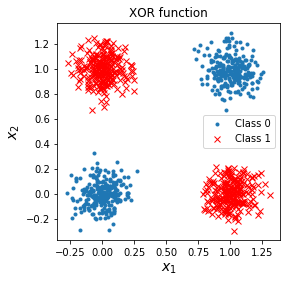

In [3]:
idx0 = np.argwhere(y_xor == 0)
idx1 = np.argwhere(y_xor == 1)

fig = plt.figure(figsize=(4,4))
plt.plot(x1n[idx0], x2n[idx0], '.', label='Class 0')
plt.plot(x1n[idx1], x2n[idx1], 'rx', label='Class 1')
plt.xlabel('$x_1$', fontsize=14)
plt.ylabel('$x_2$', fontsize=14)
plt.title('XOR function')
plt.legend()
plt.show()

In [4]:
clf = MLPClassifier(activation='relu', max_iter=10000, hidden_layer_sizes=(6,))
clf.fit(X, y_xor)

y_pred = clf.predict(Xn)

classes = clf.classes_

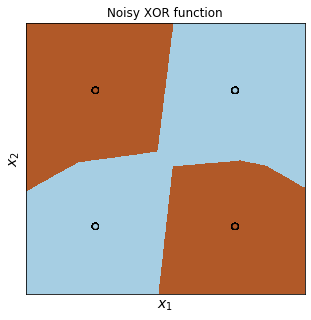

In [5]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = x1.min() - .5, x1.max() + .5
y_min, y_max = x2.min() - .5, x2.max() + .5
h = .002  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = clf.predict(np.c_[np.ones((len(xx.ravel()), 1)), xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(5, 5))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(x1, x2, c=y_xor, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('$x_1$', fontsize=14)
plt.ylabel('$x_2$', fontsize=14)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.title('Noisy XOR function')
plt.show()

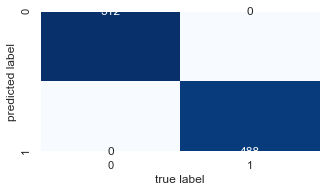

In [6]:
# Create an instance of Neighbours Classifier and fit the data with best k.
clf = MLPClassifier(activation='relu', max_iter=10000, hidden_layer_sizes=(6,))

# Train the classifier.
clf.fit(X, y_xor)

# Predict.
y_pred = clf.predict(Xn)

# Plot the confusion matrix.
fig = plt.figure(figsize=(5,5))
mat = confusion_matrix(y_xor, y_pred)
sns.set()
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=['0','1'], yticklabels=['0','1'], cmap="Blues")
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

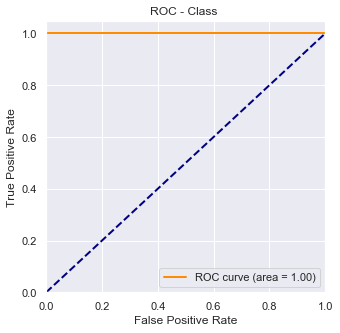

In [7]:
# Getting the probabilities for each class.
y_prob = clf.predict_proba(Xn)

# Compute ROC curve and ROC area for each class.
plt.figure(figsize=(5, 5))

fpr, tpr, _ = roc_curve(y_xor, y_prob[:, 1])
roc_auc = auc(fpr, tpr)
# Plotting ROC curve.
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - Class ')
plt.legend(loc="lower right")
plt.show()

A área abaixo da curva ROC, indica o quão bom é o classificador que está sendo utilizado, quão mais esquerda e mais acima estiver a curva, melhor o classificador. Como a área abaixo da curva gerada apresenta área igual a 1, conclui-se que a precisão do classificador é de 100%.

Para comprovar a precisão, pode também ser observada a matriz de confusão acima.